In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
gdpraw=pd.read_csv('../Inputs/GDPInputs/GDP_1997_2017.csv')

In [3]:
gdpraw.head()

,GeoFIPS,GeoName,Region,TableName,ComponentName,Unit,IndustryId,IndustryClassification,Description,1997,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,"""00000""",United States*,,SAGDP2N,Gross domestic product (GDP) by state,Millions of current dollars,1.0,...,All industry total,8577552,...,14712845,14448932,14992052,15542582,16197007,16784851,17521747,18219297,18707189,19485394
1,"""00000""",United States*,,SAGDP2N,Gross domestic product (GDP) by state,Millions of current dollars,2.0,...,Private industries,7431991.6,...,12731236.5,12403879.9,12884088.6,13405520,14037518.8,14572341,15250030.3,15878808,16319357.2,17031689.7
2,"""00000""",United States*,,SAGDP2N,Gross domestic product (GDP) by state,Millions of current dollars,3.0,11,"Agriculture, forestry, fishing, and hunting",108636.5,...,147244,129967.8,146299,180944.9,179572.7,215600.6,200841.6,181220.2,164913.2,169225.2
3,"""00000""",United States*,,SAGDP2N,Gross domestic product (GDP) by state,Millions of current dollars,4.0,111-112,Farms,88136,...,119476,103102,117629,152249,148939,184621,167940,146376,129458,(NA)
4,"""00000""",United States*,,SAGDP2N,Gross domestic product (GDP) by state,Millions of current dollars,5.0,113-115,"Forestry, fishing, and related activities",20500.5,...,27768,26865.8,28670,28695.8,30633.7,30979.6,32901.6,34844.2,35455.2,(NA)


In [4]:
gdpdata=gdpraw.loc[gdpraw['Description']=='All industry total',['GeoName','1997','1998','1999','2000','2001','2002','2003','2004','2005',
                 '2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017']]
gdpdata.set_index('GeoName',inplace=True)
gdpdata=gdpdata.transpose()
gdpdata

GeoName,United States*,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,Wisconsin,Wyoming,New England,Mideast,Great Lakes,Plains,Southeast,Southwest,Rocky Mountain,Far West
1997,8577552,104087.4,25744.8,132418,59865.6,1070523.6,136675.3,138648.8,32967.7,52451.9,...,153240.7,14724.3,489155.6,1627119.8,1382867.1,560926.9,1829512.4,874281.6,257845.5,1489302.8
1998,9062817,109404.3,24170.4,143392.4,62442.5,1147841.6,150381.7,145495.4,36783.2,54879.8,...,162523,14928.2,514166.9,1699551.6,1457511.9,587493.8,1947923.5,920980.7,279030.1,1590268
1999,9630663,115030.9,24732.6,155344.5,66816.7,1247093,164226.8,152338.1,40363.6,58832.1,...,172258.1,15710.9,542834.3,1799489.4,1538276.7,613249.8,2076000.4,973835.7,300928.4,1720712.1
2000,10252347,119242.4,26778.3,164611.6,68770,1366561,180605.5,165898.7,43389.4,61095.5,...,180539,17205.4,590719.9,1904911.1,1613515.1,653313.9,2179924.8,1049508.2,327980.8,1866556.6
2001,10581822,122449.3,28420.4,171474.2,70601.4,1384111.2,187571.9,173127.2,46448.3,65565.9,...,187939.3,18660.7,610358,1993334.1,1638932.3,670896.1,2272536.7,1097234.1,339694.4,1892552.9
2002,10936418,127792.3,29605.3,179413.3,73950.4,1436430.9,190962.8,176208.2,45757.9,70054.7,...,194813.1,19115.6,627332.9,2046227.7,1695545.3,697439.8,2364078.3,1123889.5,348673,1965635.5
2003,11458246,133739.2,31799.7,192751.2,78218.8,1527294,196483.7,181339.7,47761.6,74090.3,...,203134.7,21027.5,651259.2,2116127.8,1754840.2,734780.4,2490897.1,1190654.7,362639.7,2084276
2004,12213730,146524.7,34970.7,205420.8,84624.5,1632216.9,203980.2,198662.4,51449.4,80471.3,...,215138.9,23186.7,693897,2238502.8,1837593.2,781914.4,2674952.2,1294631.2,384547,2231723.6
2005,13036637,155970.4,39774.8,228231.2,89610,1753866.2,219907.9,208766.2,52154.1,85304.9,...,225697.9,27177.6,725250.8,2364793.2,1916168.3,821556.1,2886987.1,1412879.9,419773,2409928.3
2006,13814609,163853.6,44435.3,248230.7,94384.5,1874737.3,231205.9,222889.1,55067.4,88517.2,...,235708.6,32405.1,763509.5,2485301.1,1985254.5,857209.6,3057556.9,1548035.3,453644.7,2581433.9


In [5]:
gdppercchange=gdpdata.astype(float).pct_change()
gdppercchange=gdppercchange*100
gdppercchange

GeoName,United States*,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,Wisconsin,Wyoming,New England,Mideast,Great Lakes,Plains,Southeast,Southwest,Rocky Mountain,Far West
1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998,5.657383,5.108111,-6.115410,8.287695,4.304475,7.222447,10.028440,4.938088,11.573449,4.628812,...,6.057333,1.384786,5.113158,4.451535,5.397829,4.736250,6.472276,5.341425,8.216005,6.779360
1999,6.265668,5.142942,2.325986,8.335240,7.005165,8.646785,9.206639,4.703035,9.733792,7.201739,...,5.989983,5.243097,5.575505,5.880245,5.541279,4.384046,6.575048,5.738991,7.848006,8.202649
2000,6.455257,3.661190,8.271269,5.965515,2.923371,9.579719,9.973220,8.901647,7.496358,3.847219,...,4.807263,9.512504,8.821403,5.858423,4.891084,6.533080,5.005991,7.770561,8.989647,8.475822
2001,3.213654,2.689396,6.132204,4.168965,2.663080,1.284260,3.857247,4.357177,7.049879,7.317069,...,4.099004,8.458391,3.324435,4.641844,1.575269,2.691233,4.248399,4.547454,3.571429,1.392741
2002,3.350992,4.363439,4.169188,4.629909,4.743532,3.780021,1.807787,1.779616,-1.486384,6.846242,...,3.657457,2.437743,2.781138,2.653524,3.454261,3.956455,4.028168,2.429327,2.643140,3.861588
2003,4.771471,4.653567,7.412186,7.434176,5.771977,6.325616,2.891087,2.912180,4.378916,5.760641,...,4.271581,10.001779,3.813972,3.416047,3.497099,5.353953,5.364408,5.940548,4.005673,6.035732
2004,6.593365,9.560024,9.971792,6.573033,8.189463,6.869856,3.815329,9.552624,7.721266,8.612463,...,5.909478,10.268458,6.546979,5.782968,4.715700,6.414706,7.389109,8.732717,6.041065,7.074284
2005,6.737557,6.446490,13.737500,11.104231,5.891320,7.453011,7.808454,5.085915,1.369695,6.006614,...,4.907992,17.212022,4.518509,5.641735,4.275979,5.069826,7.926680,9.133775,9.160389,7.985070
2006,5.967582,5.054292,11.717218,8.762825,5.328088,6.891694,5.137605,6.764936,5.585946,3.765669,...,4.435442,19.234590,5.275237,5.095917,3.605435,4.339752,5.908229,9.565951,8.069052,7.116627


In [6]:
Colorado=gdppercchange.loc[['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017'],['Colorado']]
Washington=gdppercchange.loc[['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017'],['Washington']]
Oregon=gdppercchange.loc[['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017'],['Oregon']]
Alaska=gdppercchange.loc[['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017'],['Alaska']]
US=gdppercchange.loc[['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017'],['United States*']]
years = [2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017]

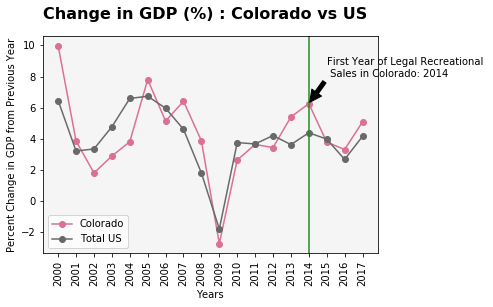

In [7]:
firstyear1=gdppercchange['Colorado']['2014']

fig1,ax1=plt.subplots()
ax1.plot(years, Colorado,color="palevioletred", label="Colorado",marker='o')
ax1.plot(years, US, color="dimgrey", label="Total US",marker='o')

plt.legend(loc="best")
fig1.suptitle("Change in GDP (%) : Colorado vs US", fontsize=16, fontweight="bold")

plt.xlabel("Years")
plt.ylabel("Percent Change in GDP from Previous Year")
plt.xticks(years,rotation='vertical')
plt.axvline(x=2014,color='forestgreen')

ax1.set_facecolor('whitesmoke')

ax1.annotate('First Year of Legal Recreational \n Sales in Colorado: 2014', xy=(2014, firstyear1), xytext=(2015, 8),
            arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

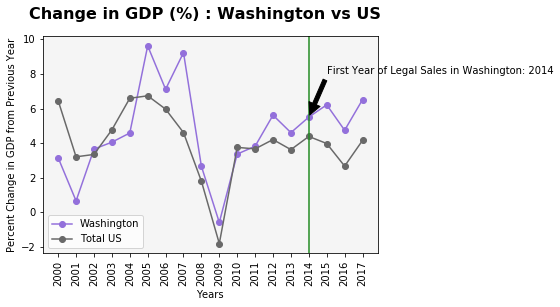

In [8]:
firstyear2=gdppercchange['Washington']['2014']

fig2,ax2=plt.subplots()
ax2.plot(years, Washington , color="mediumpurple", label="Washington",marker='o')


# Plot our line that will be used to track a wrestler's losses over the years
ax2.plot(years, US, color="dimgrey", label="Total US",marker='o')

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

fig2.suptitle("Change in GDP (%) : Washington vs US", fontsize=16, fontweight="bold")

plt.xlabel("Years")
plt.ylabel("Percent Change in GDP from Previous Year")
plt.xticks(years,rotation='vertical')
plt.axvline(x=2014,color='forestgreen')

ax2.set_facecolor('whitesmoke')

ax2.annotate('First Year of Legal Sales in Washington: 2014', xy=(2014, firstyear2), xytext=(2015, 8),
            arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

In [9]:
stats.ttest_ind(Washington, US, equal_var=False)

Ttest_indResult(statistic=array([0.90106552]), pvalue=array([0.37429844]))

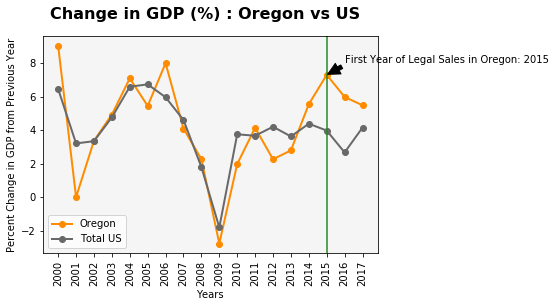

In [10]:
firstyear3=gdppercchange['Oregon']['2015']

fig3,ax3=plt.subplots()
ax3.plot(years, Oregon , color="darkorange", label="Oregon",marker='o', linewidth=2)


# Plot our line that will be used to track a wrestler's losses over the years
ax3.plot(years, US, color="dimgrey", label="Total US",marker='o',linewidth=2)

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

fig3.suptitle("Change in GDP (%) : Oregon vs US", fontsize=16, fontweight="bold")
plt.xlabel("Years")
plt.ylabel("Percent Change in GDP from Previous Year")
plt.xticks(years,rotation='vertical')
plt.axvline(x=2015,color='forestgreen')

ax3.set_facecolor('whitesmoke')

ax3.annotate('First Year of Legal Sales in Oregon: 2015', xy=(2015, firstyear3), xytext=(2016, 8),
            arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

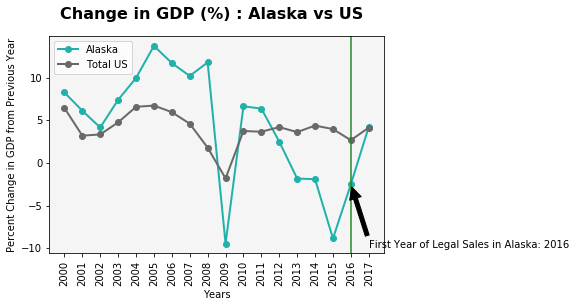

In [11]:
firstyear4=gdppercchange['Alaska']['2016']

fig4,ax4=plt.subplots()
ax4.plot(years, Alaska , color="lightseagreen", label="Alaska",marker='o', linewidth=2)


# Plot our line that will be used to track a wrestler's losses over the years
ax4.plot(years, US, color="dimgrey", label="Total US",marker='o',linewidth=2)

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

fig4.suptitle("Change in GDP (%) : Alaska vs US", fontsize=16, fontweight="bold")
plt.xlabel("Years")
plt.ylabel("Percent Change in GDP from Previous Year")
plt.xticks(years,rotation='vertical')
plt.axvline(x=2016,color='forestgreen')

ax4.set_facecolor('whitesmoke')

ax4.annotate('First Year of Legal Sales in Alaska: 2016', xy=(2016, firstyear4), xytext=(2017, -10),
            arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

In [12]:
before_legal_2014=gdppercchange.loc[['2010','2011','2012','2013'],['Colorado','Washington','United States*']]
before_legal_2014

GeoName,Colorado,Washington,United States*
2010,2.633575,3.370707,3.758894
2011,3.641562,3.826297,3.672146
2012,3.436768,5.618474,4.210529
2013,5.405721,4.610474,3.629337


In [13]:
after_legal_2014=gdppercchange.loc[['2014','2015','2016','2017'],['Colorado','Washington','United States*']]
after_legal_2014

GeoName,Colorado,Washington,United States*
2014,6.263085,5.507971,4.390245
2015,3.791560,6.215860,3.981053
2016,3.313406,4.746821,2.677886
2017,5.089375,6.515228,4.159925


In [14]:
coloradobar=[before_legal_2014['Colorado'].mean(),after_legal_2014['Colorado'].mean()]

In [15]:
washingtonbar=[before_legal_2014['Washington'].mean(),after_legal_2014['Washington'].mean()]

In [16]:
statesbar=[before_legal_2014['United States*'].mean(),after_legal_2014['United States*'].mean()]

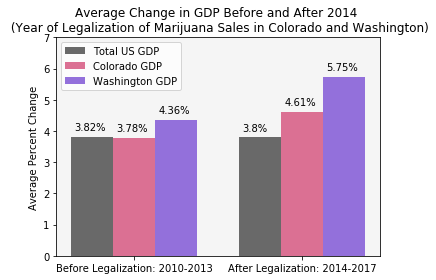

In [17]:
n_groups=2
fig4,ax4=plt.subplots()
index=np.arange(n_groups)
bar_width=0.25

bar1=ax4.bar(index,statesbar,color='dimgrey', width=bar_width ,label='Total US GDP')
bar2=ax4.bar(index+bar_width,coloradobar,color='palevioletred', width=bar_width ,label='Colorado GDP')
bar3=ax4.bar(index+(2*bar_width),washingtonbar,color='mediumpurple', width=bar_width ,label='Washington GDP')


ax4.set_ylabel('Average Percent Change')
ax4.set_title('Average Change in GDP Before and After 2014 \n (Year of Legalization of Marijuana Sales in Colorado and Washington)')
ax4.set_xticks(index + (2*bar_width) / 2)
ax4.set_xticklabels(('Before Legalization: 2010-2013','After Legalization: 2014-2017'))
ax4.legend(loc='upper left')
ax4.set_ylim(0,7)
ax4.set_facecolor('whitesmoke')

fig4.tight_layout()

# find the values and append to list
totals=[]
for i in ax4.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax4.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax4.text(i.get_x()+0.02, i.get_height()+.2, str(round(i.get_height(),2))+'%', fontsize=10,color='black')


plt.show()

In [18]:
before_legal_2015=gdppercchange.loc[['2012','2013','2014'],['Oregon','United States*']]
before_legal_2015

GeoName,Oregon,United States*
2012,2.269236,4.210529
2013,2.802174,3.629337
2014,5.553267,4.390245


In [19]:
after_legal_2015=gdppercchange.loc[['2015','2016','2017'],['Oregon','United States*']]
after_legal_2015

GeoName,Oregon,United States*
2015,7.303626,3.981053
2016,5.986417,2.677886
2017,5.488351,4.159925


In [20]:
oregonbar=[before_legal_2015['Oregon'].mean(),after_legal_2015['Oregon'].mean()]

In [21]:
statesbar2=[before_legal_2015['United States*'].mean(),after_legal_2015['United States*'].mean()]

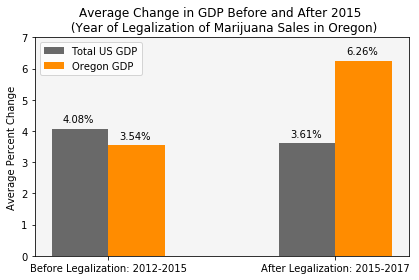

In [22]:
n_groups1=2
fig5,ax5=plt.subplots()
index=np.arange(n_groups1)
bar_width=0.25

bar4=ax5.bar(index,statesbar2,color='dimgrey', width=bar_width ,label='Total US GDP')
bar5=ax5.bar(index+bar_width,oregonbar,color='darkorange', width=bar_width ,label='Oregon GDP')


ax5.set_ylabel('Average Percent Change')
ax5.set_title('Average Change in GDP Before and After 2015 \n (Year of Legalization of Marijuana Sales in Oregon)')
ax5.set_xticks(index + bar_width / 2)
ax5.set_xticklabels(('Before Legalization: 2012-2015','After Legalization: 2015-2017'))
ax5.legend(loc='upper left')
ax5.set_ylim(0,7)
ax5.set_facecolor('whitesmoke')

fig5.tight_layout()

# find the values and append to list
totals=[]
for i in ax5.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax5.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax5.text(i.get_x()+0.05, i.get_height()+.2, str(round(i.get_height(),2))+'%', fontsize=10,color='black')


plt.show()